In [111]:
import numpy as np
import talib
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import time
from keybert import KeyBERT
import seaborn as sns
#from wordcloud import WordCloud, STOPWORDS
import yfinance as yf 
import nltk
from nltk.corpus import stopwords 
from wordcloud import STOPWORDS




# path to the CSV file
file_path = (r"C:/Users/pc/Desktop/10 Academy/Week 1/sentiment-analysis/nootbooks/data/raw_analyst_ratings.csv")

df = pd.read_csv(file_path)
df.info()
df.head()

c:\Users\pc\Desktop\sentiment-analysis-new\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [18]:
df.isna().sum()

# removing punctuations
df['headline'] = df['headline'].replace("[^a-zA-Z]", " ", regex=True)
df['headline'].head()


0              Stocks That Hit    Week Highs On Friday
1           Stocks That Hit    Week Highs On Wednesday
2                           Biggest Movers From Friday
3            Stocks Moving In Friday s Mid Day Session
4    B of A Securities Maintains Neutral on Agilent...
Name: headline, dtype: object

In [24]:
df['headline'] .nunique()
df['headline'] .value_counts().head()

headline
   biggest movers from yesterday            13049
benzinga s top upgrades                      5449
benzinga s top downgrades                    5372
benzinga s top initiations                   4241
stocks that hit    week lows on thursday     3962
Name: count, dtype: int64

In [25]:

# converting headline to lower case
new_Index = ['headline']  

for index in new_Index:
    df[index] = df[index].str.lower()
df['headline'].head()

0              stocks that hit    week highs on friday
1           stocks that hit    week highs on wednesday
2                           biggest movers from friday
3            stocks moving in friday s mid day session
4    b of a securities maintains neutral on agilent...
Name: headline, dtype: object

In [26]:
#applying sentiment to the headline
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# applying sentiment analysis function to the headline
df['sentiment'] = df['headline'].apply(calculate_sentiment)

In [27]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock,sentiment
0,0,stocks that hit week highs on friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.0
1,1,stocks that hit week highs on wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.0
2,2,biggest movers from friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.0
3,3,stocks moving in friday s mid day session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.0
4,4,b of a securities maintains neutral on agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.0


In [28]:
df[['headline', 'sentiment']]

,headline,sentiment
0,stocks that hit week highs on friday,0.00
1,stocks that hit week highs on wednesday,0.00
2,biggest movers from friday,0.00
3,stocks moving in friday s mid day session,0.00
4,b of a securities maintains neutral on agilent...,0.00
...,...,...
1407323,top narrow based indexes for august,0.15
1407324,recap wednesday s top percentage gainers and ...,0.15
1407325,update oppenheimer color on china zenix auto ...,0.00
1407326,oppenheimer initiates china zenix at outperfor...,0.00


In [29]:
# 
most_positive_headline = df.nlargest(5, 'sentiment')
most_positive_headline[['headline', 'sentiment']]

,headline,sentiment
819,best buy analysts upgrades downgrades,1.0
1343,onemove tm records its best month ever in july,1.0
1382,klondike silver completes underground drilling...,1.0
1849,best stocks of,1.0
2270,miners the best way to play a rate hike,1.0


In [30]:
# 
most_negative_headline = df.nsmallest(5, 'sentiment')
most_negative_headline[['headline', 'sentiment']]

,headline,sentiment
2552,tech semiconductors among worst performers as...,-1.0
3175,i ve just made a horrible investment,-1.0
5658,worst performing industries for october,-1.0
5710,worst performing industries for december,-1.0
6100,worst stocks of,-1.0


In [31]:
most_neutral_headline = df.iloc[(df['sentiment'] - 0).abs().argsort()[:5]]
most_neutral_headline[['headline', 'sentiment']]


,headline,sentiment
0,stocks that hit week highs on friday,0.0
842595,motorcar parts of america sees fy adj sales...,0.0
842596,motorcar parts of america q adj eps mi...,0.0
842597,auto parts stocks moving in friday s session,0.0
842598,biggest movers from yesterday,0.0


Task 1

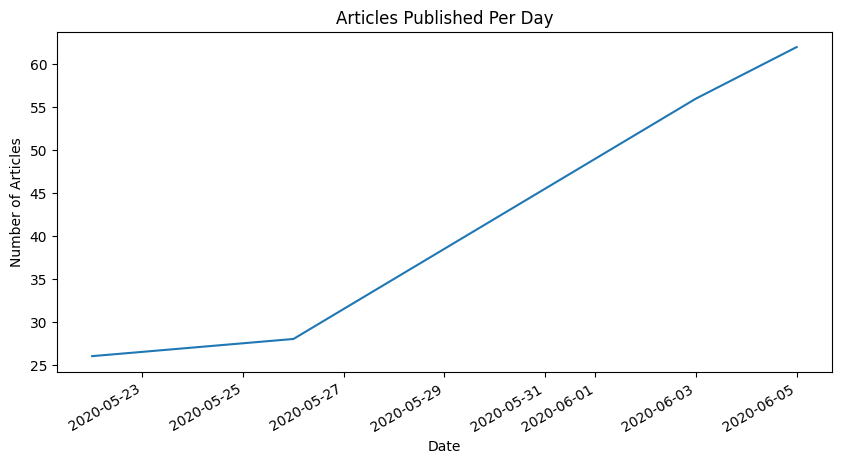

In [88]:

# Convert 'date' column to datetime (no format param, let pandas infer)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows where conversion failed
df = df.dropna(subset=['date'])

# Now, convert datetime to date only
# df['date'] = df['date'].dt.date

# Count articles by date
articles_per_day = df['date'].value_counts().sort_index()

# Plot
articles_per_day.plot(title="Articles Published Per Day", figsize=(10, 5))
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.show()



Text Analysis(Topic Modeling)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


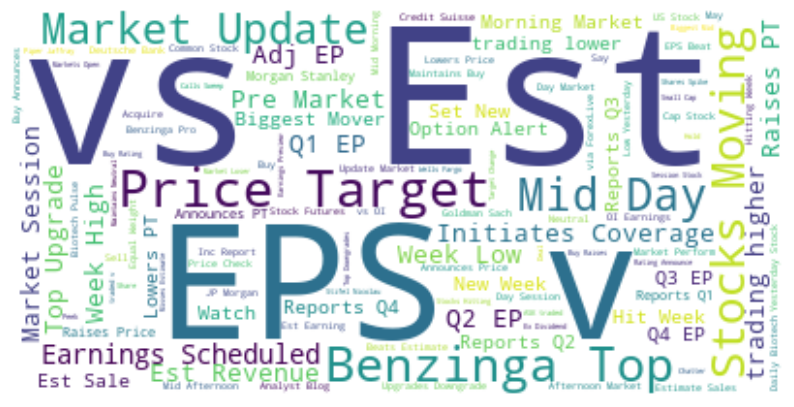

In [23]:

# Download NLTK stopwords 
nltk.download('stopwords')

# Get stopwords from both sources
nltk_stopwords = set(stopwords.words('english'))
wordcloud_stopwords = set(STOPWORDS)

# Combine them
combined_stopwords = nltk_stopwords.union(wordcloud_stopwords)

# Join all headlines into one string
text = ' '.join(df['headline'].astype(str))

# Generate the word cloud with combined stopwords
wordcloud = WordCloud(stopwords=combined_stopwords, background_color='white').generate(text)

# Plot it
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Load CSV
file_path = r"C:/Users/pc/Desktop/10 Academy/Week 1/sentiment-analysis/nootbooks/data/raw_analyst_ratings.csv"
df = pd.read_csv(file_path)

# Optional: drop rows with missing headlines
df = df.dropna(subset=['headline'])

# Start timer
start_time = time.time()

# Process each headline with spaCy
processed_docs = [nlp(headline) for headline in df['headline'].astype(str)]

# End timer
end_time = time.time()

# Show elapsed time
elapsed_time = end_time - start_time
print(f"Processing time for {len(processed_docs)} headlines: {elapsed_time:.2f} seconds")


In [89]:
# Force parsing all strings into datetime objects
df['publisher'] = df['publisher'].astype(str) 
df['publisher'] = pd.to_datetime(df['publisher'], errors='coerce', utc=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_24232\1584595226.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['publisher'] = pd.to_datetime(df['publisher'], errors='coerce', utc=True)


In [90]:
# saving the cleaned data name as cleaned_analyst_ratings.csv
df.to_csv(r"C:/Users/pc/Desktop/10 Academy/Week 1/sentiment-analysis/nootbooks/data/cleaned_analyst_ratings.csv")

In [91]:
df['date'] = df['publisher'].dt.date
daily_counts = df.groupby('date').size()

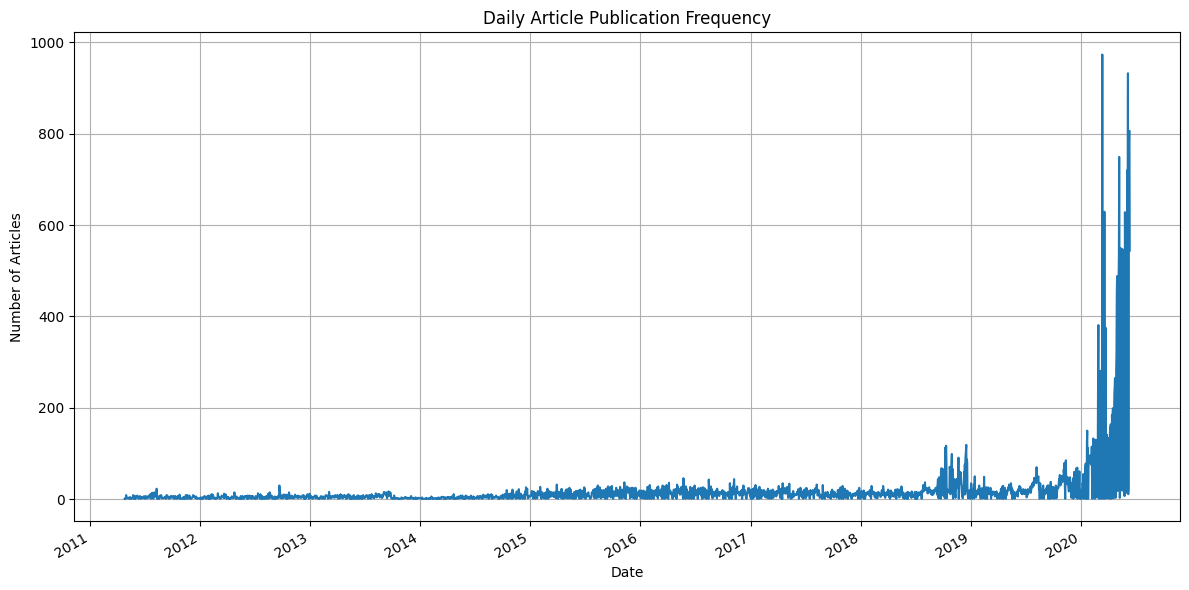

In [ ]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])

# Group by date and count the number of articles
daily_counts = df['date'].dt.date.value_counts().sort_index()

# Optional: Ensure the index is datetime for better plotting
daily_counts.index = pd.to_datetime(daily_counts.index)

# Plotting
plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title('Daily Article Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.tight_layout()
plt.show()


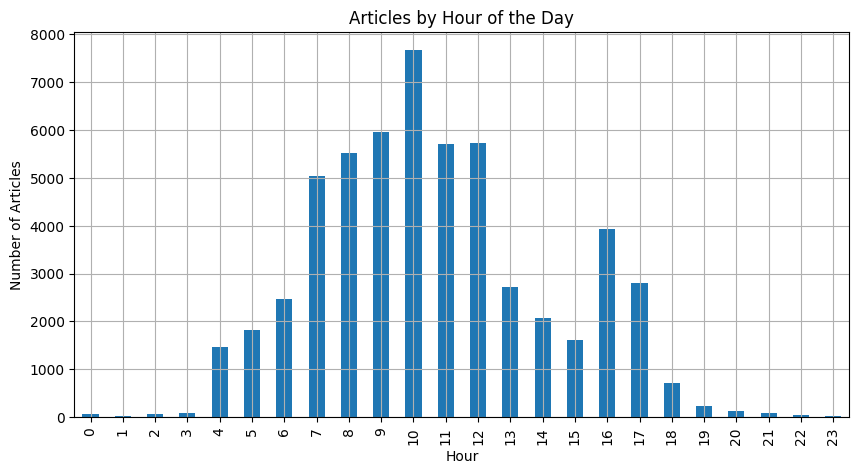

In [74]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')


df['hour'] = df['date'].dt.hour
df['hour'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title("Articles by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.show()



In [102]:
print(df['publisher'].isnull().sum())
print(df['publisher'].unique())


172
<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns, UTC]


In [107]:

df = pd.read_csv((file_path), parse_dates=['date'])  # Only parse 'date' column as datetime
print(df['publisher'].head())  # Should show strings (publisher names)
print(df['publisher'].value_counts())
print(df.columns)               # Check all column names
print(df['publisher'].dtype)




0    Benzinga Insights
1    Benzinga Insights
2           Lisa Levin
3           Lisa Levin
4           Vick Meyer
Name: publisher, dtype: object
publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64
Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')
object


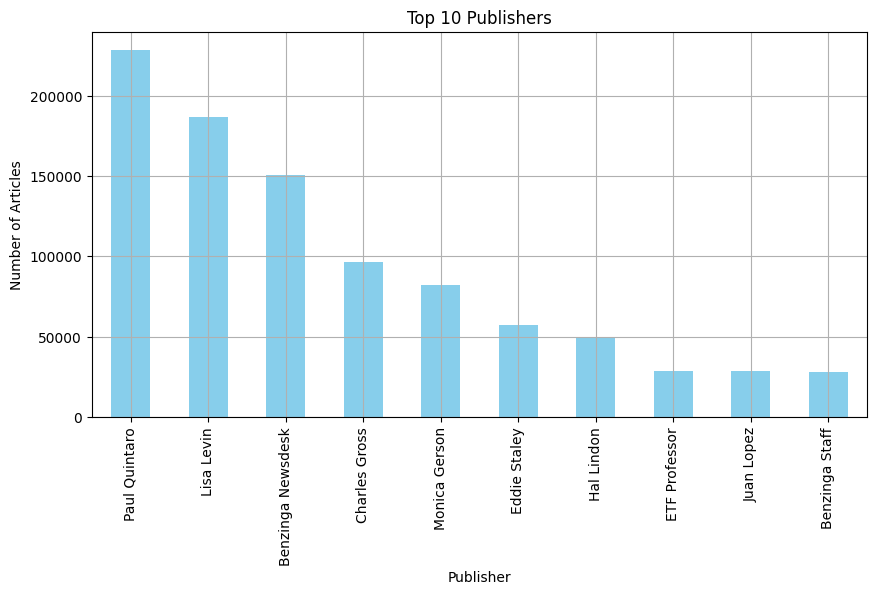

In [108]:
top_publisher = df['publisher'].value_counts().head(10)
top_publisher.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("Top 10 Publishers")
plt.xlabel("Publisher")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.show()


In [96]:

# sns.countplot(data=df, x='publisher', hue='stock')
# plt.xticks(rotation=45)
# plt.title("Number of Articles by Publisher by Stock")
# plt.show()


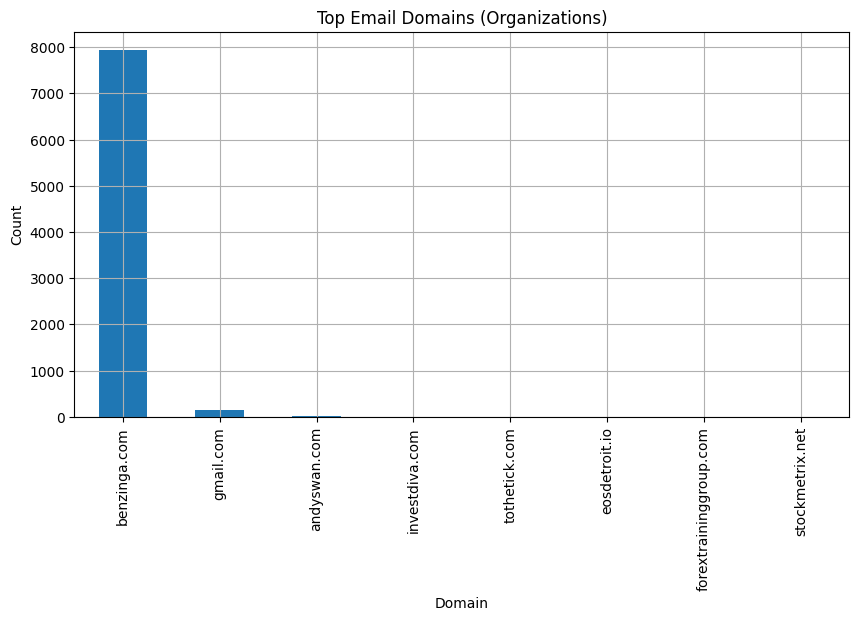

In [109]:
df['domain'] = df['publisher'].str.extract(r'@([\w\.-]+)')
df['domain'].value_counts().head(10).plot(kind='bar', figsize=(10,5))
plt.title("Top Email Domains (Organizations)")
plt.xlabel("Domain")
plt.ylabel("Count")
plt.grid(True)
plt.show()


In [ ]:



kw_model = KeyBERT()
keywords = kw_model.extract_keywords(" ".join(df['headline'].dropna()), 
                                     keyphrase_ngram_range=(1, 2), 
                                     stop_words='english', 
                                     top_n=20)

for kw in keywords:
    print(kw)




In [113]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['headline'].dropna())

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

words = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx + 1}:")
    print(" ".join([words[i] for i in topic.argsort()[:-11:-1]]))


KeyboardInterrupt: 